# Pittsburgh's Best Neighborhood
**Metric:** Greenest Neighborhood in Pittsburgh

**Name:** Alex McCulloch

**Group:** Green Beans

**Partners:** Advaitha Agastheeswaran, Benjamin Jackson

**WPRDC Dataset:**  [Greenways] (https://data.wprdc.org/dataset/greenways/resource/28116520-b7d4-4895-9d4f-6b5c843a5650)

### First, let's import everything that we need to organize our CSV

In [30]:
import pandas as pd
import geopandas
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Next, let's see a sample of our entire CSV file

In [34]:
# import dataset
greenways = pd.read_csv("greenways.csv", low_memory = False)

# display first 3 rows
greenways.head(3)

,_id,objectid_1,objectid,area,perimeter,greenway,greenway_i,name,acres,sqmiles,...,dpwdiv,shape_leng,date_resol,label,shape_length,shape_area,created_user,created_date,last_edited_user,last_edited_date
0,2212,1,23.0,1.858947e+06,31202.044922,0.0,4,Beechview Seldom Seen,42.675374,0.066681,...,5,31202.045653,1985-07-15T00:00:00,Beechview - Seldom Seen Greenway,14626.978183,1.858947e+06,pgh.dcp.allisot,2024-04-10,pgh.dcp.allisot,2024-04-10
1,2213,2,0.0,1.201580e+06,26922.017578,4.0,6,Moore,27.584380,0.043101,...,5,26922.017619,2006-10-20T00:00:00,Moore Greenway,16334.131937,1.201580e+06,pgh.dcp.allisot,2024-04-10,pgh.dcp.allisot,2024-04-10
2,2214,3,NaN,5.083942e+05,3822.361084,NaN,12,Nine Mile Run,11.671078,0.018236,...,3,NaN,2012-05-11T00:00:00,Nine Mile Run Greenway,8518.013454,5.083942e+05,pgh.dcp.allisot,2024-04-10,pgh.dcp.allisot,2024-04-10


### Now, let's take a sample of only the data we will be working with
Below are the first three Pittsburgh Greenways listed in the CSV displayed with witheir neighborhood, label, area, and acres

In [36]:
#only show Neighborhood, Name of Greenway, Area of the Greenway, and Acreage of the Greenway
greenways[['nhood', 'label', 'area', 'acres']]

,nhood,label,area,acres
0,Beechview,Beechview - Seldom Seen Greenway,1.858947e+06,42.675374
1,Brookline,Moore Greenway,1.201580e+06,27.584380
2,Squirrel Hill South,Nine Mile Run Greenway,5.083942e+05,11.671078
3,Perry South,Perry South Greenway,5.581352e+05,12.812969
4,NaN,Bigelow Greenway,1.053815e+06,24.192173
5,Perry North,Observatory Hill Hollows Greenway,7.813766e+05,17.937867
6,NaN,Allegheny River Greenway,1.523838e+06,37.815402
7,South Oakland,Oakcliffe Greenway,2.226447e+05,5.111200
8,NaN,Spring Hill / Spring Garden Greenway,2.064316e+06,47.389975
9,Hazelwood,Hazelwood Greenway,2.566833e+05,3.132885


### Good. Now our data is more sorted

However, we have a problem: 
Bigelow, Allegheny River, and Spring Hill Spring Garden do not belong to a specific neighborhood in the CSV.

To fix this, we can manually add the acreage to the acreage of the neighborhood they belong to. 

Here is what we need to add to our CSV file:

- Bigelow Greenway is in Southside

- Allegheny River Greenway is in Lawrenceville 

- Spring Hill / Spring Garden Greenway is in Spring Hill/Spring Garden

In [39]:
replacement_values = {
    4: 'Southside',
    6: 'Lawrenceville',
    8: 'Spring Hill/Spring Garden'
}

for index, value in replacement_values.items():
    greenways.loc[index, 'nhood'] = value

### Now that we've made those changes, we can print and save our new updated dataframe

In [42]:
print("\nUpdated DataFrame:")
print(greenways)

greenways.to_csv('new_greenways.csv', index=False)
greenways.to_csv('C:/Users/alexm/Downloads/Data-Visualization/new_greenways.csv', index=False)


Updated DataFrame:
    _id  objectid_1  objectid          area     perimeter  greenway  \
0  2212           1      23.0  1.858947e+06  31202.044922       0.0   
1  2213           2       0.0  1.201580e+06  26922.017578       4.0   
2  2214           3       NaN  5.083942e+05   3822.361084       NaN   
3  2215           4      47.0  5.581352e+05  18576.343750       6.0   
4  2216           5       0.0  1.053815e+06  55200.765625       0.0   
5  2217           6   24771.0  7.813766e+05  22569.248047       5.0   
6  2218           7       0.0  1.523838e+06  24508.027344       0.0   
7  2219           8       0.0  2.226447e+05   6321.647949       0.0   
8  2220           9       2.0  2.064316e+06  21532.105469       7.0   
9  2221          10      25.0  2.566833e+05  48166.937500       3.0   

   greenway_i                       name      acres   sqmiles  ... dpwdiv  \
0           4      Beechview Seldom Seen  42.675374  0.066681  ...      5   
1           6                      Moore  27

### Now that we have a CSV file with all of the values that we need, we can organize our data by neighborhood (nhood) and acerage (acres) in decending order

In [45]:
new_greenways = pd.read_csv("new_greenways.csv", low_memory = False)
new_greenway_acres = new_greenways.groupby("nhood").sum()['acres']
new_greenway_acres.sort_values(ascending=False)

nhood
Spring Hill/Spring Garden    47.389975
Beechview                    42.675374
Lawrenceville                37.815402
Brookline                    27.584380
Southside                    24.192173
Perry North                  17.937867
Perry South                  12.812969
Squirrel Hill South          11.671078
South Oakland                 5.111200
Hazelwood                     3.132885
Name: acres, dtype: float64

### Let's put this data into a bar graph.

Text(0, 0.5, 'Acres of Greenways')

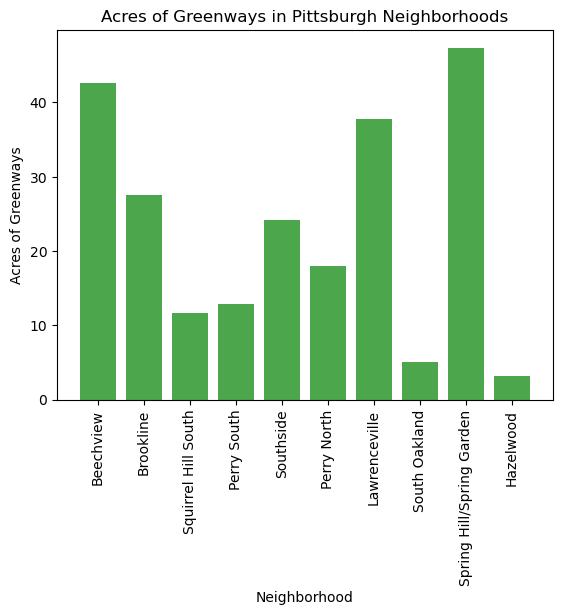

In [48]:
plt.bar(new_greenways['nhood'], new_greenways['acres'], color='green', alpha=0.7)  # creates bar graph comparing neighborhoods with acres
plt.xticks(rotation=90, ha='center') # turns x-axis labels vertical

# adds title to bar graph
plt.title("Acres of Greenways in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Acres of Greenways")

### From this sorted dataset, we can see that Spring Hill/ Spring Garden has the most greenways.

Thus, by this metric, Spring Hill/ Spring Garden is the most green neighbohood in the Pittsburgh.